<a href="https://colab.research.google.com/github/irawan555/MachineLearningTasks/blob/main/UAS/Code/CIFAR_10_Irawan_Mardiansyah_1103210174_TK4504.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Irawan Mardiansyah

NIM : 1103210174

Kelas : TK4504

Tugas : UAS

Dataset: CIFAR-10

Link GPT: https://chatgpt.com/share/9a6c9f52-c534-408f-b1d2-f4c58dd8728e

# **Langkah 1: Import Library yang Diperlukan**

In [1]:
import numpy as np # Mengimpor library numpy untuk manipulasi array
import matplotlib.pyplot as plt # Mengimpor library matplotlib untuk visualisasi data
import tensorflow as tf # Mengimpor library tensorflow untuk membangun dan melatih model machine learning
from tensorflow.keras.datasets import cifar10 # Mengimpor dataset CIFAR-10 dari keras
from tensorflow.keras.models import Sequential # Mengimpor class Sequential untuk membuat model neural network berurutan
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # Mengimpor lapisan-lapisan yang akan digunakan dalam model
from tensorflow.keras.utils import to_categorical # Mengimpor fungsi untuk konversi label menjadi one-hot encoding

# **Langkah 2: Memuat dan Menampilkan Gambar dalam Dataset**

170498071/170498071 [==============================] - 5s 0us/step


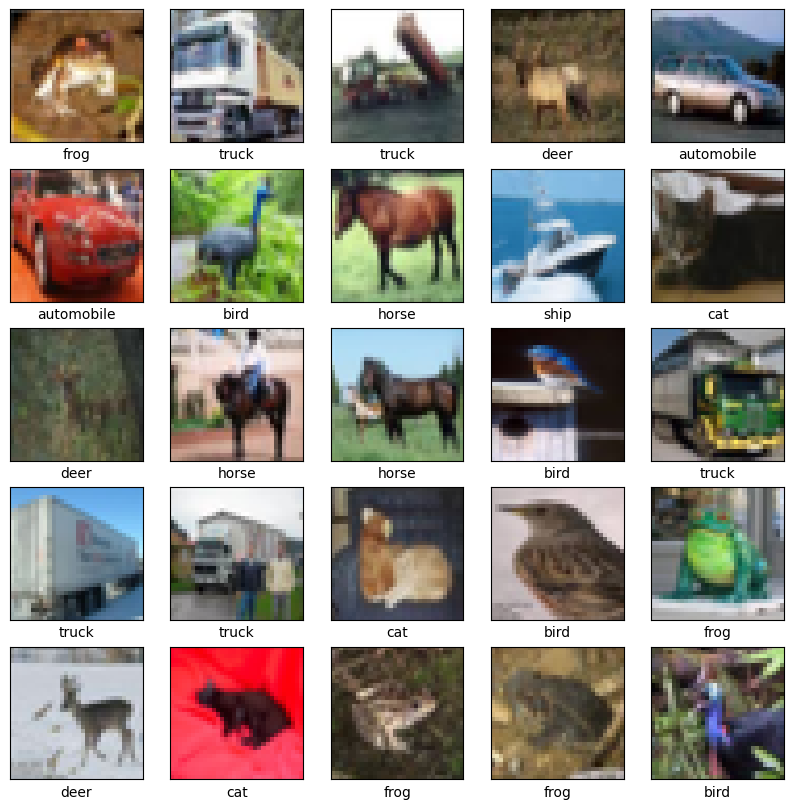

In [2]:
# Memuat dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Menampilkan beberapa gambar dari dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[i][0]])
    plt.show()

plot_images(x_train, y_train, class_names)

# **Langkah 3: Pengolahan Data**

In [3]:
# Normalisasi gambar
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encoding label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# **Langkah 4: Membangun Model CNN**

In [4]:
# Membuat model CNN dengan beberapa lapisan
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Mengompilasi model dengan optimizer Adam dan loss function categorical_crossentropy
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# **Langkah 5: Melatih Model**

In [5]:
# Melatih model dengan data training
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 76s 47ms/step - loss: 1.7034 - accuracy: 0.3713 - val_loss: 1.3060 - val_accuracy: 0.5288
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.3750 - accuracy: 0.5101 - val_loss: 1.1648 - val_accuracy: 0.5828
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.2299 - accuracy: 0.5686 - val_loss: 1.0914 - val_accuracy: 0.6156
Epoch 4/10
1563/1563 [==============================] - 76s 48ms/step - loss: 1.1364 - accuracy: 0.6031 - val_loss: 0.9741 - val_accuracy: 0.6534
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0642 - accuracy: 0.6294 - val_loss: 1.0260 - val_accuracy: 0.6423
Epoch 6/10
1563/1563 [==============================] - 74s 48ms/step - loss: 1.0135 - accuracy: 0.6477 - val_loss: 0.9620 - val_accuracy: 0.6621
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9623 - accuracy: 0.6670 - val_loss: 0.9075 -

# **Langkah 6: Membuat Prediksi dan Visualisasi**

313/313 [==============================] - 11s 31ms/step


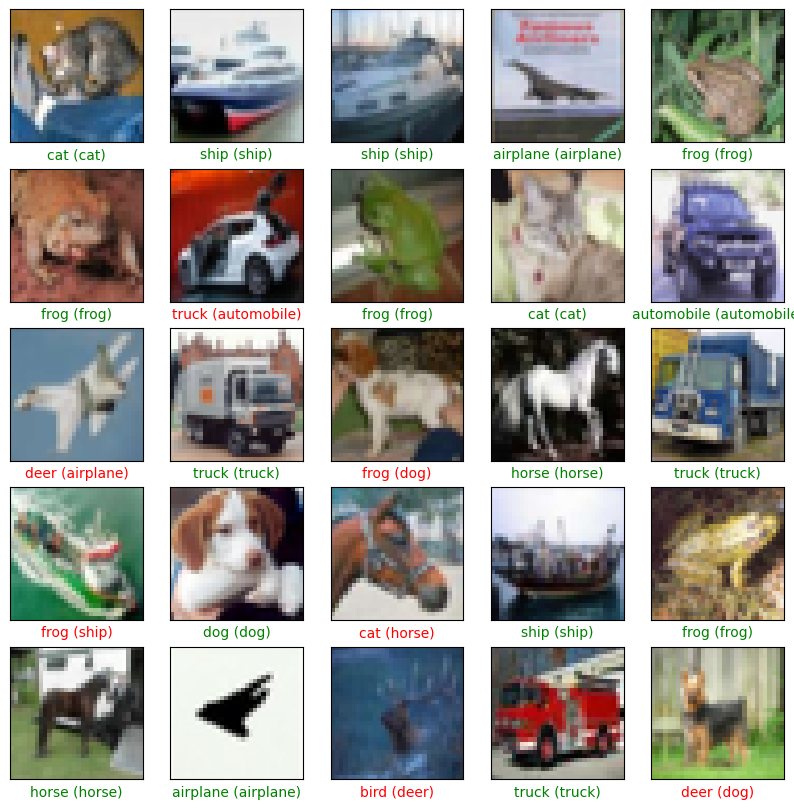

In [6]:
# Membuat prediksi pada dataset uji
predictions = model.predict(x_test)

def plot_predictions(images, true_labels, pred_labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        true_label = class_names[np.argmax(true_labels[i])]
        pred_label = class_names[np.argmax(pred_labels[i])]
        color = 'green' if true_label == pred_label else 'red'
        plt.xlabel(f"{pred_label} ({true_label})", color=color)
    plt.show()

plot_predictions(x_test, y_test, predictions, class_names)

# **Langkah 7: Visualisasi Heatmap**

313/313 [==============================] - 4s 14ms/step


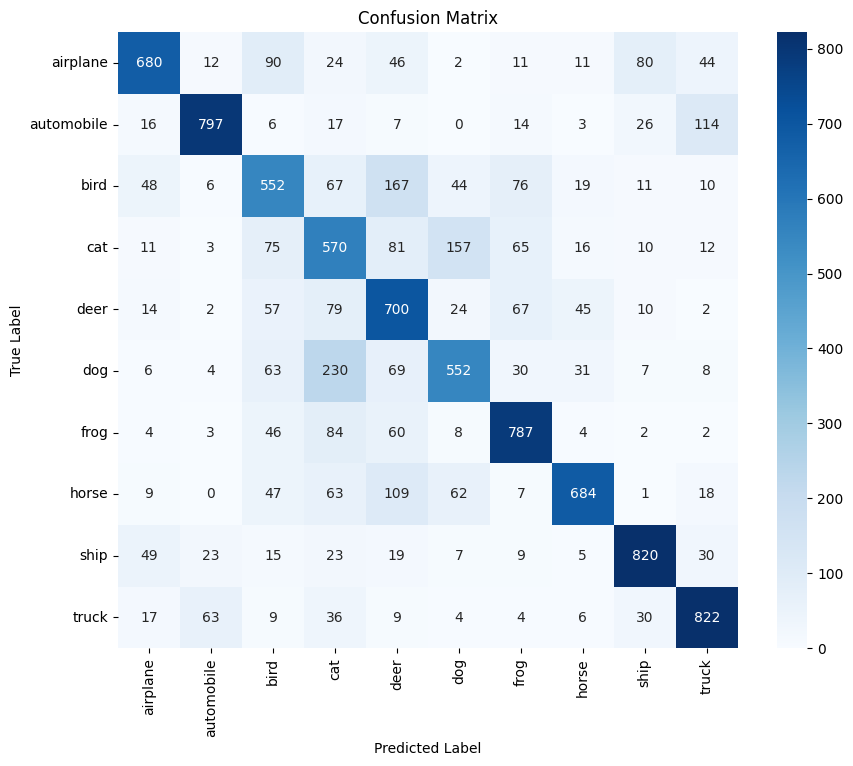

In [7]:
import seaborn as sns # Mengimpor library seaborn untuk visualisasi data
from sklearn.metrics import confusion_matrix # Mengimpor fungsi untuk membuat matriks kebingungan

# Membuat prediksi pada dataset uji
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Membuat matriks kebingungan
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualisasi matriks kebingungan sebagai heatmap
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(conf_matrix, class_names)